In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
   
   # Load data
df = pd.read_csv(r"D:\Anagha\PAPER\ML_PAPER_PREP\titanic.csv")
   
   # Initial exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [5]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = df.drop('Cabin', axis=1, errors= 'ignore')
   
   # Create new features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df.head()

C:\Users\Pramod\AppData\Local\Temp\ipykernel_36292\3293148377.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Pramod\AppData\Local\Temp\ipykernel_36292\3293148377.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1


In [8]:
# Q1: What's the overall survival rate?
survival_rate = df['Survived'].mean()
print("What's the overall survival rate?",survival_rate)
   
   # Q2: Survival rate by gender?
gender_survival = df.groupby('Sex')['Survived'].mean()
print("Survival rate by gender?\n",gender_survival)
   
   # Q3: Survival rate by class?
class_survival = df.groupby('Pclass')['Survived'].mean()
print("Survival rate by class?\n",class_survival)
   
   # Q4: Age distribution of survivors vs non-survivors?
survivors = df[df['Survived'] == 1]['Age']
non_survivors = df[df['Survived'] == 0]['Age']
print("Survivors and non survivors\n", survivors,non_survivors)
   
   # Q5: Did family size affect survival?
family_survival = df.groupby('FamilySize')['Survived'].mean()
print("Did family size affect survival?\n",family_survival)


What's the overall survival rate? 0.3838383838383838
Survival rate by gender?
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Survival rate by class?
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Survivors and non survivors
 1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64 0      22.0
4      35.0
5      28.0
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888    28.0
890    32.0
Name: Age, Length: 549, dtype: float64
Did family size affect survival?
 FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


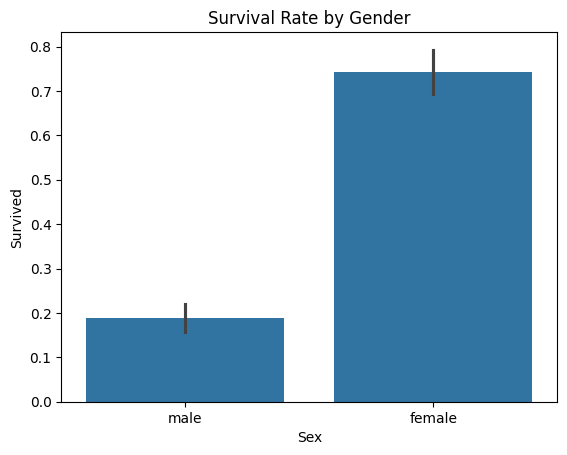

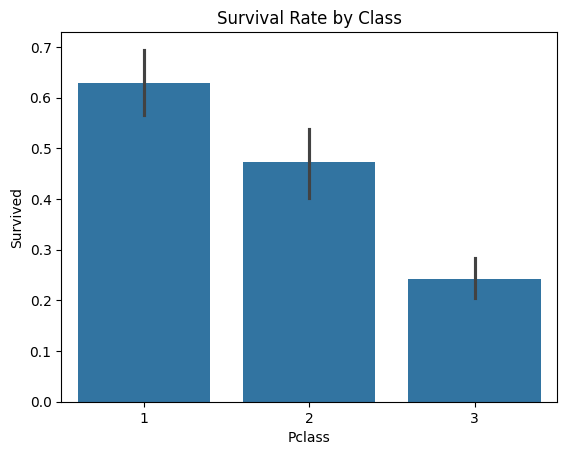

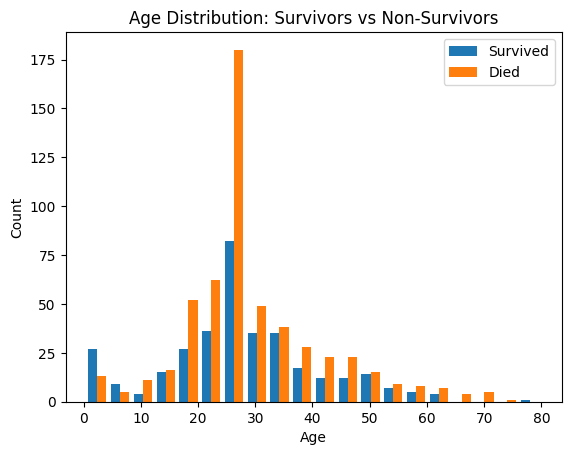

In [9]:
# Visualization 1: Survival by Gender
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()
   
   # Visualization 2: Survival by Class
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Class')
plt.show()
   
   # Visualization 3: Age Distribution
plt.hist([survivors, non_survivors], label=['Survived', 'Died'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.show()